# W207, Final Project
Spring, 2018

Team: Cameron Kennedy, Gaurav Khanna, Aaron Olson

## Predictive Modeling Notebook
Python Notebook 2 of 2

This notebook runs machine learning models to predict the data.

The other notebook (1 of 2) preps the data and extracts features.

In [1]:
#Import Required Libraries
#Data manipulation and visualization
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models et al
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost
#from sklearn.preprocessing import CategoricalEncoder  #Not yet released!

#Metrics
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, 
    precision_score, confusion_matrix, classification_report)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the data
df_fa = pd.read_pickle('features_all.pkl')  #Pickle format preserves file as python object
#df_tf = pd.read_pickle('tf.pkl')

In [3]:
# Test
print('%d Entries in the DF: ' %(len(df_fa)))
print('%d Features' %(len(df_fa.columns)))
df_fa.head()

88544 Entries in the DF: 
128 Features


,city,bd,gender,registered_via,registration_init_time,is_churn,"(date_features, date, max_date)","(date_features, date, min_date)","(date_features, date, listening_tenure)","(within_days_7, num_unq, sum)",...,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_amount_paid_per_day
msno,,,,,,,,,,,,,,,,,,,,,
mKfgXQAmVeSKzN4rXW37qz0HbGCuYBspTBM3ONXZudg=,1,0,NaN,13,20170120,0,2017-02-24,2017-01-20,35,1,...,0.0,30,30,129,129,1,20170220,20170319,0,4.300000
AFcKYsrudzim8OFa+fL/c9g5gZabAbhaJnoM0qmlJfo=,1,0,NaN,13,20160907,0,2017-02-27,2016-09-07,173,228,...,0.0,30,30,129,129,1,20170207,20170306,0,4.300000
qk4mEZUYZq+4sQE7bzRYKc5Pvj+Xc7Wmu25DrCzltEU=,1,0,NaN,13,20160902,0,2017-02-26,2016-09-02,177,243,...,0.0,30,30,129,129,1,20170202,20170301,0,4.300000
G2UGNLph2J6euGmZ7WIa1+Kc+dPZBJI0HbLPu5YtrZw=,1,0,NaN,13,20161028,0,2017-02-28,2016-10-28,123,121,...,0.0,30,30,149,149,1,20170228,20170327,0,4.966667
EqSHZpMj5uddJvv2gXcHvuOKFOdS5NN6RalHfzEhhaI=,1,0,NaN,13,20161004,0,2016-10-26,2016-10-04,22,14,...,0.0,30,30,129,129,1,20170204,20170303,0,4.300000


In [4]:
#Let's count # of unique users
len(df_fa.groupby(['msno'], sort=False).size())

88544

In [5]:
p.replace([np.inf, -np.inf], -9999, inplace=True)

NameError: name 'p' is not defined

In [6]:
#Fix column headers
df_fa.columns = df_fa.columns.map(''.join)

In [7]:
#Some quick wrangling
#ONLY RUN THIS CELL ONCE!!  (else it will try to re-join and spit back an error)

#Drop erroring date fields
#FUTURE: Convert dates to Y, M, D  ######### IMPORTANT, DO THIS!!!!   ###########
df_fa.drop('date_featuresdatemax_date', axis=1, inplace=True)
df_fa.drop('date_featuresdatemin_date', axis=1, inplace=True)
#df_fa.drop('transaction_date', axis=1, inplace=True)
#df_fa.drop('membership_expire_date', axis=1, inplace=True)

#Convert gender variable (string) to dummy encoding
dummy = pd.get_dummies(df_fa['gender'])
df_fa = pd.concat([df_fa, dummy], axis=1)
df_fa.drop('gender', axis=1, inplace=True)

In [8]:
#Let's count # of unique users
len(df_fa.groupby(['msno'], sort=False).size())

88544

In [9]:
#summary
df_fa.head()

,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,...,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_amount_paid_per_day,female,male
msno,,,,,,,,,,,,,,,,,,,,,
mKfgXQAmVeSKzN4rXW37qz0HbGCuYBspTBM3ONXZudg=,1,0,13,20170120,0,35,1,1.000000,1,10.068,...,30,129,129,1,20170220,20170319,0,4.300000,0,0
AFcKYsrudzim8OFa+fL/c9g5gZabAbhaJnoM0qmlJfo=,1,0,13,20160907,0,173,228,32.571429,7,32731.138,...,30,129,129,1,20170207,20170306,0,4.300000,0,0
qk4mEZUYZq+4sQE7bzRYKc5Pvj+Xc7Wmu25DrCzltEU=,1,0,13,20160902,0,177,243,34.714286,7,60581.740,...,30,129,129,1,20170202,20170301,0,4.300000,0,0
G2UGNLph2J6euGmZ7WIa1+Kc+dPZBJI0HbLPu5YtrZw=,1,0,13,20161028,0,123,121,24.200000,5,30054.147,...,30,149,149,1,20170228,20170327,0,4.966667,0,0
EqSHZpMj5uddJvv2gXcHvuOKFOdS5NN6RalHfzEhhaI=,1,0,13,20161004,0,22,14,7.000000,2,2399.824,...,30,129,129,1,20170204,20170303,0,4.300000,0,0


In [ ]:
#Output full features to csv file, for quick inspection as needed.
#df_fa.to_csv('df_fa.csv')

# Quick Exploratory Data Analysis

In [ ]:
color = ['red', 'blue']
plt.figure()
for color, i, name in zip(color, [0,1], ['no_churn', 'churn']):
    plt.scatter(df_fa[df_fa['is_churn'] == i]['date_featuresdatelistening_tenure'],
               df_fa[df_fa['is_churn'] == i]['within_days_7num_unqmean'], color = color, alpha = 0.2, label = name)
plt.legend(loc = 'best')
plt.xlabel('Listening Tenure')
plt.ylabel('Mean Number of Unique listening Periods in the last 7 days')

Looking at the above plot, we can see that overall people who churn have low numbers of unique plays, meaning they aren't using the music service. We can also see a spike in number of unique plays for users who have a long tenure (>700 days). Intuitively this makes sense as users who are commited to the service (have used the service for a long time) may have developed lifestyle patterns where they use the service while driving/working/etc.

In [ ]:
avg_price_no_churn = round(df_fa[df_fa['is_churn'] == 0]['amount_paid_per_day'].mean(), 2)
avg_price_is_churn = round(df_fa[df_fa['is_churn'] == 1]['amount_paid_per_day'].mean(), 2)
print('Avg cost/day for no churn: %.2f' %avg_price_no_churn)
print('Avg cost/day for churn: %.2f' %avg_price_is_churn)

In [ ]:
corr = df_fa.iloc[:, 8:99:15].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask)

In [ ]:
mean_col = df_fa.iloc[:, 7:98:15].mean()
mean_col

In [ ]:
#plt.plot_date(reg_time, df_fa['within_days_7total_secsmean'], )
color = ['red', 'blue']
for color, i, name in zip(color, [0,1], ['no_churn', 'churn']):
    plt.plot_date(pd.to_datetime(df_fa[df_fa['is_churn'] == i]['registration_init_time'], format = '%Y%m%d'),
               df_fa[df_fa['is_churn'] == i]['within_days_7total_secsmean']/(60*60), color = color, alpha = 0.2, label = name)
plt.legend(loc = 'best')
plt.xlabel('Registration Date')
plt.ylim([0,20])
plt.ylabel('Number of Seconds (Avg) Listed during last 7 days')

This plot shows the Registration Date vs Avg seconds listened over past 7 days. The intent will be to change this to transaction date as this will more accurately reflect when the user ends service. We can see a trend in more churn occuring in the last 4 years of the dataset. This could be due to an increased level of users however (same proportion of churn).

In [ ]:
df_fa['registration_time'] = pd.to_datetime(df_fa['registration_init_time'], format = '%Y%m%d').map(lambda x: x.year)
reg_count = []
thirty_day_churn = []
for year in range(2005, 2018):
    reg_count.append(sum(df_fa['registration_time'] == year))
    thirty_day_churn.append(len(df_fa[(df_fa['registration_time'] == year) & (df_fa['date_featuresdatelistening_tenure'] < 30) & (df_fa['is_churn'] == 1)])/sum(df_fa['registration_time'] == year))
plt.bar(range(2005, 2018), reg_count)
plt.xlabel('Year of Registration')
plt.title('Registration Count Per Year')
plt.show

In [ ]:
plt.bar(range(2005, 2018), thirty_day_churn)
plt.xlabel('Year')
plt.title('Proportion of 30 day Churn to Total Registration')
plt.show

This statistic shows that there is a high level of churn recently for users who are using a trial subscription, or who a very short duration subscription. From a business perspective this is concerning, because it means that a very high level of churn is occuring, and the problem needs to be solved to reduce churn levels back. The sharp spike may have been when the company started offering 30 days subscriptions or some other factor that has caused increased churn for customers with less than 30 day subscriptionps.

# Predictive Modeling!

In [ ]:
dev.info()
dev[dev.is_churn==0].info()
dev_sub
dev2
########### YOU LEFT OFF HERE, JUST HAVING FIGURED OUT HOW TO GET DEV2 INTO A FRAME ###########

In [10]:
#Split data into a) train, dev, & test, b) data & labels

np.random.seed(5)  #Set so that % churn is somewhat consistent

#Train, Dev, Test splits: 60/25/15
train, devtest = train_test_split(df_fa, test_size=0.4)
dev, test = train_test_split(devtest, test_size=15/40)

#Check churn percentages
print('Check churn percentages:')
print('  All data, % churn: {:.1%}'.format(df_fa['is_churn'].sum() / df_fa['is_churn'].count()))
print('Train data, % churn: {:.1%}'.format(train['is_churn'].sum() / train['is_churn'].count()))
print('  Dev data, % churn: {:.1%}'.format(dev['is_churn'].sum() / dev['is_churn'].count()))
print(' Test data, % churn: {:.1%}'.format(test['is_churn'].sum() / test['is_churn'].count()))

#Reduce dev set to 6% churn

#Select x rows is_churn == 1; append to all rows where is_churn == 0
dummy, dev_sub = train_test_split(dev[dev.is_churn==1], test_size=0.03)
dev = pd.concat([dev[dev.is_churn==0], dev_sub], ignore_index=True)

#Split data / labels
train_labels = train['is_churn']
train_data = train.drop('is_churn', axis=1)
dev_labels = dev['is_churn']
dev_data = dev.drop('is_churn', axis=1)
test_labels = test['is_churn']
test_data = test.drop('is_churn', axis=1)

print('\nCheck data sizes:')
print('Train data / test: ', train_data.shape, train_labels.shape)
print('  Dev data / test: ', dev_data.shape, dev_labels.shape)
print(' Test data / test: ', test_data.shape, test_labels.shape)

#Baseline (if we guess all 0's, this is what we get)
print('\nBaseline Accuracy: {:.2%}'.format(1-(dev['is_churn'].sum() / dev['is_churn'].count())))

Check churn percentages:
  All data, % churn: 50.6%
Train data, % churn: 50.7%
  Dev data, % churn: 50.4%
 Test data, % churn: 50.2%

Check data sizes:
Train data / test:  (53126, 126) (53126,)
  Dev data / test:  (11321, 126) (11321,)
 Test data / test:  (13282, 126) (13282,)

Baseline Accuracy: 97.04%


In [ ]:
#let's look at our data
dev_data.describe()
dev_data.isnull().sum(axis=0)
dev_data.info()
# for col in train_data.columns:
#     pass

In [ ]:
dev_data.describe()

In [ ]:
#Scale / normalize data?  Consider doing this if needed.

#Migrate from pandas to numpy?  Also consider if needed.

In [ ]:
### NB Attempt ###
clf_NB_Gauss = GaussianNB()
clf_NB_Gauss.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_NB_Gauss.score(dev_data, dev_labels)))
#Awful!

In [ ]:
### KNN Attempt ###
clf_neigh = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)  #Accuracy plateaus around n=10, all 0's
clf_neigh.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_neigh.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_neigh.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_neigh.predict(dev_data)))
#Bust.  Predicts all 0's

In [ ]:
### Random Forest Attempt ###
clf_RF = RandomForestClassifier(n_jobs=-1, random_state=12, class_weight={0: 1, 1: 1}, criterion='gini')
clf_RF.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_RF.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_RF.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_RF.predict(dev_data)))

In [ ]:
#### SVM Attempts ###
clf_SVM = svm.SVC(kernel='rbf', C=1, max_iter=640)  #max_iter=635 gives 6% accuracy ... need new approach / tuning
clf_SVM.fit(train_data, train_labels)
print('\nAccuracy: {:.2%}'.format(clf_SVM.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_SVM.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_SVM.predict(dev_data)))

In [ ]:
#Basic XGB Classifier
clf_XGB = xgboost.XGBClassifier(n_jobs=-1, reg_lambda=600)
clf_XGB.fit(train_data, train_labels)
print('\nAccuracy: {:.2%}'.format(clf_XGB.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_XGB.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_XGB.predict(dev_data)))

In [11]:
#XGB Classifier with Grid Search
# param_grid = {
#     'reg_lambda': [1, 200, 600], 
#     #'n_estimators' : [100, 300],
#     #'max_depth': [3, 5, 15, 25],
#     #'max_features': [3, 5, 10, 20]
# }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

tuned_parameters = [{'reg_lambda': [0.1, 1, 10],
                     'learning_rate': [0.1],
                    }]

# scores = ['precision', 'recall']
scorers = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

clf = GridSearchCV(xgboost.XGBClassifier(n_jobs=7),
                   tuned_parameters,
                   #cv=2,
                   scoring='recall')
clf.fit(train_data, train_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=7, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'reg_lambda': [0.1, 1, 10], 'learning_rate': [0.1]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [ ]:
clf.grid_scores_

In [ ]:
clf.best_score_

In [ ]:
clf.score(dev_data, dev_labels)

In [ ]:
clf.predict_proba(dev_data)


In [ ]:
print('\nAccuracy: {:.2%}'.format(clf.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf.predict(dev_data)))
print(confusion_matrix(dev_labels, clf.predict(dev_data)))

In [12]:
# Get the probabilities for economic model

# Prediction probabilities
predictions_prob = clf.predict_proba(dev_data)
# Predictions
predictions = clf.predict(dev_data)

# Test
print('Dev data shape: ', dev_data.shape)
print('Predictions shape: ', predictions.shape)
print('Predictions: ', predictions[:5])
print('Prediction probabilities shape: ', predictions_prob.shape)
print('Some prediction probabilities:')
print(predictions_prob[:5])

Dev data shape:  (11321, 126)
Predictions shape:  (11321,)
Predictions:  [0 0 0 0 0]
Prediction probabilities shape:  (11321, 2)
Some prediction probabilities:
[[  9.08032179e-01   9.19678137e-02]
 [  9.83488560e-01   1.65114421e-02]
 [  9.96444046e-01   3.55592556e-03]
 [  9.99869347e-01   1.30681801e-04]
 [  9.98054028e-01   1.94598280e-03]]


In [18]:
# Starting the marketing data frame
marketing_data = dev_data.copy(deep = True)
print('marketing_data shape: ', marketing_data.shape)

marketing_data shape:  (11321, 127)


In [24]:
# Marketing data frame
# This'll all most variables, probability of churn and the proposed spend
# Reacquistion cost (marketing spend to prevent churn):
# RAC = .75 * CAC * POC * (LTV/OLTV)

# Predictions and probability of churn (from the model)
marketing_data['predictions'] = predictions
marketing_data['probability_churn'] = predictions_prob[:,1]


SyntaxError: invalid syntax (<ipython-input-24-d069ad8fb0b5>, line 13)

In [28]:
# Optimum life time value can be represented by the max of "amount paid per day" among our sample
oltv = marketing_data['amount_paid_per_day'].max()
print(oltv)

13.45


In [30]:
# LTV can be represented by spend/day or latest spend/day
# We are choosing latest spend/day

# Reacquistion cost (marketing spend to prevent churn):
# RAC = .75 * CAC * POC * (LTV/OLTV)

# Assume that CAC is $2
cac = 2

marketing_data['proposed_spend'] = (predictions_prob[:,1] 
                                    * predictions 
                                    * (marketing_data['amount_paid_per_day']/oltv)
                                    * cac)

(11321, 129)


(11321, 129)


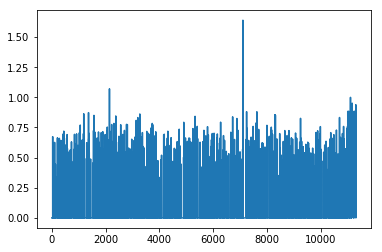

In [31]:
print(marketing_data.shape)
marketing_data.head()

In [ ]:
#Plot accuracy results ('stole' this code from sklearn documentation)
clf_current = clf_XGB
clf_current = clf

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=20)
    plt.yticks(tick_marks, classes, size=20)

    fmt = '.1%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), size=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

class_names = [0, 1]
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(dev_labels, clf_current.predict(dev_data))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

plt.show()

# Initial Insights and Takeaways

Here are our initial insights and commentary from our analysis:

**Data Preparation and Feature Extraction**

* The team spent most of its time on data acquisition and feature extraction, and less on modeling. We think this mimics real-world situations.
* Our initial data set was ~30GB, with our largest table containing 392 million rows (and 9 columns). Because of its large size, we chose to use 1% of the data to build our predictive model. In doing so, we ensured our primary feature to predict, user churn, had approximately the same ratio in our 1% data set as we saw in the full data. In both cases, roughly 6% of users churned, which we noted as an imbalanced data set that we will address in our modeling. Our final data set contained ~50K users.
* Because our churn data was by user (the user column is labeled 'msno'), we extracted several features from both the user_logs table and the transactions table, and in both cases we aggregated them at the user level. Most of our aggregations were sums, means, and counts. We also incorporated 'recency' into our features, that is, we used aggregations relative to a user's last use of the service (e.g., average number of songs played in the past 7, 14, 30, etc. days).
* Though not shown, the team performed several data audits of individual users to ensure the aggregations and other data preparations matched manual calculations of the same data.

**Modeling**

* The team performed a brief exploratory data analysis as seen above, but it is by no means intended to be comprehensive.
* The team split the data into training, dev, and test sets with a ratio of 60/25/15.
* The team tried several models: Gaussian Naive Bayes, K Nearest Neighbors, Random Forest, Support Vector Machine, and XGBoost. Of these, XGBoost and Random Forests performed best. Both had high accuracies (96.4% and 97.1%, respectively), and they had recalls (currently) at 78% and 55%, respectively.
* We're placing an emphasis on recall as our primary metric, moreso than accuracy. Our thinking here is that accuracy has a 'baseline' of 94% (predicting all 0's, i.e., no users churn), making our current best prediction of ~97% much less impressive. Moreover, we're okay with some false positives but would prefer to minimize false negatives. In other words, we'd rather predict a few customers as likely to churn when in fact they would actually stay (false positives) as opposed to predicting customers who would stay but who actually churn (false negatives). This assumption presumes that the long-term cost of keeping customers (for example, the cost of offering discounts) is less than the long-term loss associated with losing customers. Admittedly, more domain knowledge would be required to validate this assumption, but we consider that validation beyond the scope of the project.
* We're not entirely assuming that all reasons for the churn are captured in the data set we have (Usage and Transactions). We're believing that some are and we are biased to find churn particularly dependent on those reasons (features). This helps the business as metrics captured in the data can be influenced more easily than external factors. Examples of these features are cost/day in the plan and the user tenure.

**Next Steps**

We've identified several items before the final submission:

* Feature extraction: We plan to look at additional features we can extract from the data. Ideas include:
    * Changes in recent behavior compared to long-term behavior (e.g., # of songs heard in the past 7 days vs. the past 180 days)
    * Comparing the transaction metrics between the last 2 transactions
    * Differences in transaction activity vs. usage (e.g., customers who might still be paying monthly fees but not listening to music)
    * Scaling / normalizing features
    * Better handling of date features
* Model tweaking: Adjusting model parameters and employing GridSearch to automate this process.
* Provide more documentation of the approach and analysis:
    * Writing more about the hypotheses of our features
    * Including our data discription (largely what we provided a couple weeks ago that lists our primary tables and feature names)
* Improving code where possible for efficiency, readability, commenting, and function descriptions.

We look forward to continuing to work on the project and welcome any feedback!

## Doodling with Probabilities

In [ ]:
df_prob = pd.concat([pd.DataFrame(clf.predict_proba(dev_data)), dev_labels.to_frame()], axis=1)

for i in range(20):    
    bin_prob = df_prob[(df_prob[1] >= i/20) & (df_prob[1] <= (i+1)/20)]
    prob_num = bin_prob.is_churn.sum()
    prob_den = len(bin_prob)
    print(i/20, 'to', (i+1)/20, prob_num, prob_den, prob_num / prob_den)

#Horrible at probabilties ... highly uncalibrated.